**Univariate Exploratory Data Analysis (EDA)** is the simplest form of analyzing one variable at a time. It's main purpose is to explore data through summary statistics and visual charts, and graphs to (1) finds patterns in the data, and (2) make better decisions regarding data pre-processing tasks.

In [52]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [53]:
# loading data set as Pandas dataframe
df = pd.read_csv("./datasets/automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [54]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleaning

In [55]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
price_mean = price.astype(int).mean()
df['price'] = df['price'].replace('?', price_mean).astype(int)
df['price'].head()


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [56]:
print( "Mean: {:.2f}".format(df['price'].mean()))
print( "Median: {:.2f}".format(df['price'].median()))
print( "Std: {:.2f}".format(df['price'].std()))
print( "Var: {:.2f}".format(df['price'].var()))
print( "Quantiles: \n",df['price'].quantile([0.25,0.5,0.75]))

Mean: 13207.13
Median: 10595.00
Std: 7868.77
Var: 61917513.18
Quantiles: 
 0.25     7788.0
0.50    10595.0
0.75    16500.0
Name: price, dtype: float64


In [57]:
# Cleaning the horsepower field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hp_mean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hp_mean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [58]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int32

Now computing the Measure of central tendency of the values in column height. Remember taking only a single column of the data set we are making a univariate analysis.

In [59]:
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


# Data Visualization
Now let's visualize this analysis in graph.

<Axes: >

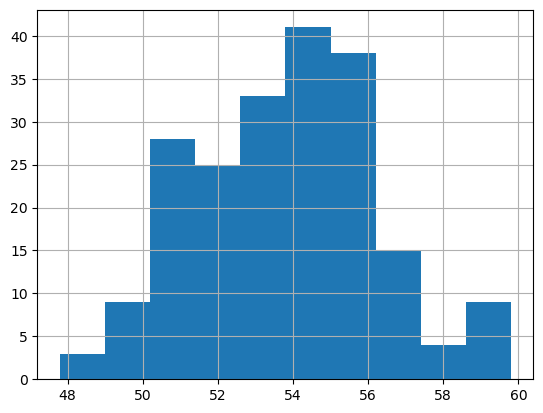

In [60]:
#distribution plot
df.height.hist()

From the above graph, we can observe that the hight of most cars ranges from 53 to 57.

<Axes: >

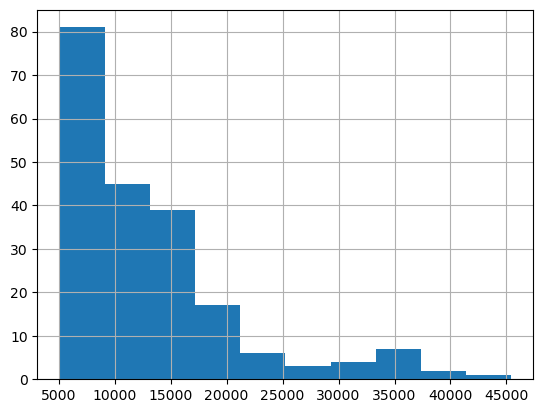

In [61]:
df.price.hist()

From the above graph, we can say that the price ranges from 5,000 to 45,000 but the price for most cars ranges between 5,000 to 10,000.

The box plot is also effective visual representation of statical measures like median and quartiles in univariate analysis.

In [69]:
# Calculate skewness
skewness = df.price.skew()
if skewness > 0:
    print("Positive Skewness: {:.2f}".format(skewness))
elif skewness < 0:  
    print("Negative Skewness: {:.2f}".format(skewness))
else:
    print("No Skewness")
    

Positive Skewness: 1.83


{'whiskers': [<matplotlib.lines.Line2D at 0x23a232b63c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a232b7890>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a233c42c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a2335c410>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a2335d100>],
 'means': []}

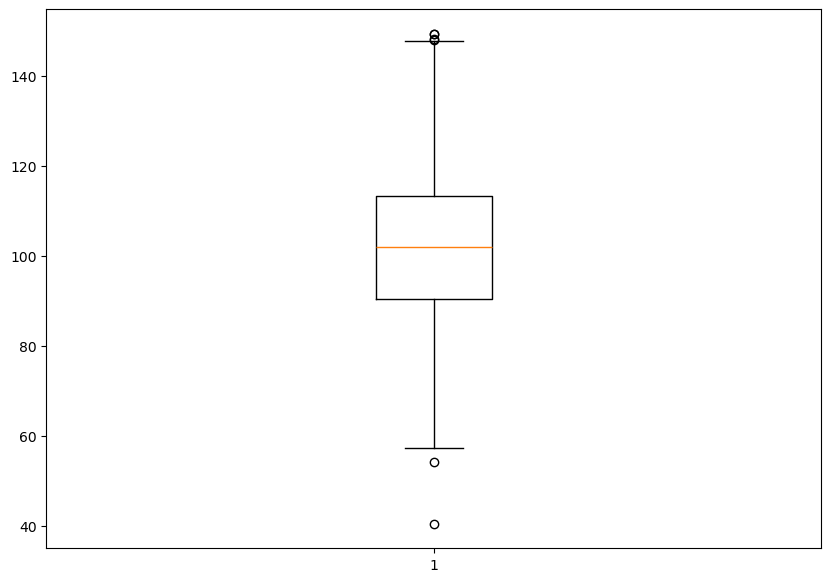

In [63]:
# Simple poxplot example

# Generating random numbers from a normal distribution with 
# mean 100 and standard deviation 20
np.random.seed(10)
data = np.random.normal(100, 20, 200)
plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data)

<Axes: xlabel='price'>

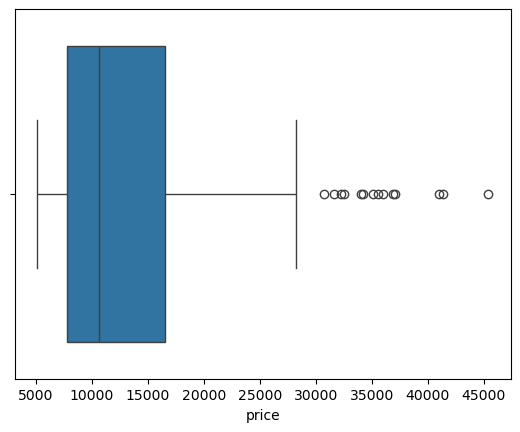

In [64]:
#boxplot for price of cars
sns.boxplot(data=df, x="price")

The right border of the box is Q3 and the left border of the box is Q1. Whiskers extend from both sides of the box boundaries toward ± IQR × 1.5. Any values beyond these limits are marked as outliers (using points).

<Axes: xlabel='Month', ylabel='Sales'>

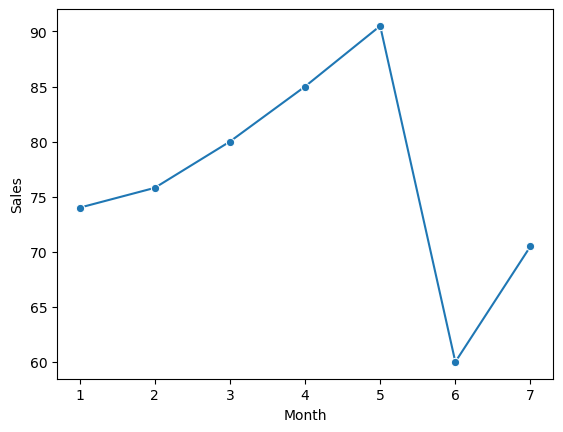

In [65]:
# Simple lineplot example
months = [1, 2, 3, 4, 5, 6, 7]
sales = [74, 75.8, 80, 85, 90.5, 60, 70.5]

sales_df = pd.DataFrame({"Month": months, "Sales": sales})
sns.lineplot(x = "Month", y = "Sales", data=sales_df, marker='o')

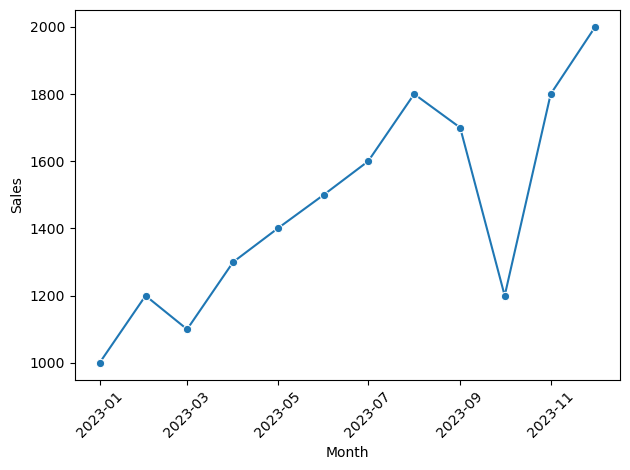

In [66]:
# Simple lineplot example
# Sample monthly sales data
months = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
sales = [1000, 1200, 1100, 1300, 1400, 1500, 1600, 1800, 1700, 1200, 1800, 2000]

# Create a DataFrame
df_sales = pd.DataFrame({'Month': months, 'Sales': sales})
sns.lineplot(x = "Month", y = "Sales", data=df_sales, marker='o')

# Plotting the LinePlot
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In this example, the LinePlot visualizes the monthly sales trend for the retail store in 2023. We can observe any fluctuations or any seasonal patterns in sales over the course of the year, helping stakeholders understand the performance of the business over time. e.g. upward trend with growth in sales except a drop in the month of October.